# Importing packages and load CNN

In [1]:
# Load the extension
%load_ext autoreload
# Autoreload all modules
%autoreload 2

In [31]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   .ipynb_checkpoints/Actual_lab_cavity_alignment-with_GA-checkpoint.ipynb
	modified:   Actual_lab_cavity_alignment-with_GA.ipynb
	modified:   funcs.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/camera_test-checkpoint.ipynb
	.png
	camera_test.ipynb
	do.py
	tmp_beam_picture.png

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git 

In [3]:
from funcs import *

# Telling the notebook to make plots inline.
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', family='serif', size=12)

Cavity Mirror scanning range is [0, 2.8e-06] micron. The used range [0, 1.4e-07] micron should not go out.
Steering Mirror scanning range is [-0.0262, 0.0262] rad. The used range [-0.0262, 0.0262] rad should not go out.


## Start camera and DAC

In [3]:
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
print("Using Camera ", camera.GetDeviceInfo().GetModelName())
camera.Open()

# Sanity checks
print('Camera Auto Gain is :', camera.GainAuto())
if camera.GainAuto() == 'Off':
    print('Safe to go ahead with the code..')
else:
    print('***Warning: Camera Auto Gain is ON!***\nTurn it off using Pylon software.')
camera.ExposureTimeAbs = Exposure

# Start DAC
start_channel = 1
bus = busworks.BusWorks_DAC()
bus.start()
print("DAC on IP: ", bus.address)

Using Camera  acA720-290gm
Camera Auto Gain is : Off
Safe to go ahead with the code..
DAC on IP:  192.168.1.231


## Initial State

Initial condition: 3.16412353515625


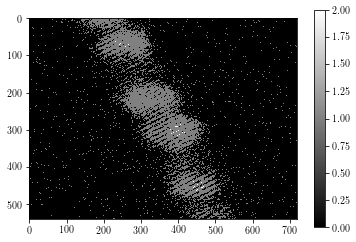

In [4]:
Img_initial = Capture_image(1000, camera)
print('Initial condition: {}'.format(Img_initial.sum()/n_pixl**2))
plt.imshow(Img_initial[::-1], cmap=cm.binary_r)
plt.colorbar()

In [5]:
# Initial condition of beam
current_beam_status = np.zeros(num_params)

## Alignment loop



Range: 2.0 x waist


 Gen: 0 Range: 1.2783086873522436 x waist
Time: 20.17747211456299, Fittest Parent: [ 5.89964446e-04  5.41173593e-04  7.71040972e-04 -4.37847663e-04
  5.26681307e-07], Fitness: 37.67120361328125


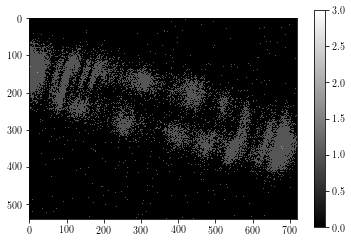



 Gen: 1 Range: 0.817036550080108 x waist
Time: 40.63585925102234, Fittest Parent: [9.30518250e-04 4.32237954e-05 5.85477517e-04 4.54163784e-04
 4.53938183e-07], Fitness: 58.210693359375


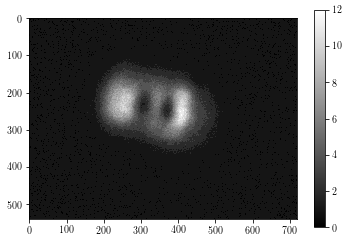



 Gen: 2 Range: 0.5222124599258542 x waist
Time: 61.09543418884277, Fittest Parent: [ 4.81763389e-06  4.16036386e-05 -1.42514836e-04 -3.52531155e-04
 -9.72051126e-08], Fitness: 77.13006591796875


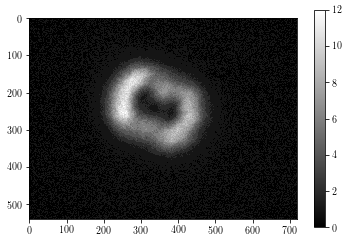



 Gen: 3 Range: 0.3337743620834024 x waist
Time: 81.58285713195801, Fittest Parent: [-2.62986847e-04 -2.38296670e-04  9.31721358e-04 -7.85120326e-04
  7.78837220e-07], Fitness: 80.0394287109375


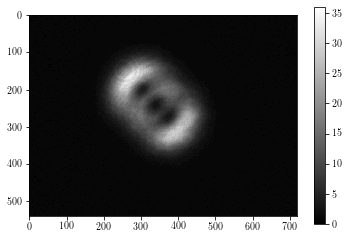



 Gen: 4 Range: 0.2133333333333333 x waist
Time: 102.04357767105103, Fittest Parent: [-1.07919564e-04 -1.34793294e-05 -6.83217393e-04  6.72514062e-04
 -9.47685449e-07], Fitness: 109.43072509765625


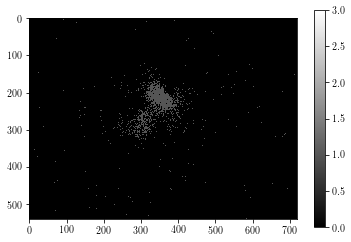



 Gen: 5 Range: 0.13635292665090595 x waist
Time: 122.51361751556396, Fittest Parent: [ 1.04528076e-04  7.74495155e-05  3.05890152e-06 -8.40564754e-05
 -1.65354974e-07], Fitness: 107.9500732421875


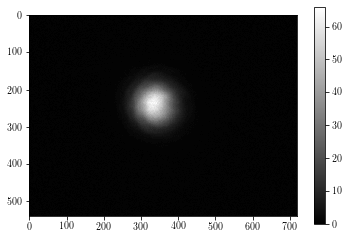



 Gen: 6 Range: 0.08715056534187816 x waist
Time: 142.98865246772766, Fittest Parent: [ 4.75681568e-05 -8.52349446e-06  6.65274957e-04  5.96118150e-05
 -3.90533485e-08], Fitness: 98.983154296875


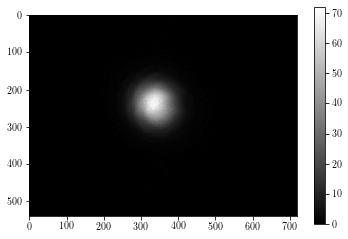



 Gen: 7 Range: 0.0557026623920911 x waist
Time: 163.46612358093262, Fittest Parent: [-2.23400753e-04 -4.42565416e-05  4.50998170e-05  2.73104614e-04
 -6.13138433e-08], Fitness: 163.55584716796875


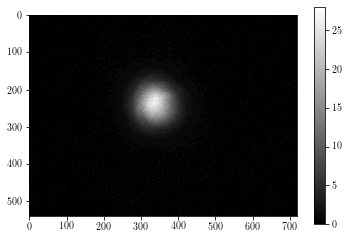



 Gen: 8 Range: 0.03560259862222958 x waist
Time: 183.94853329658508, Fittest Parent: [ 4.14000956e-05 -1.29849682e-05 -1.01761142e-04  7.27100153e-05
 -4.92497140e-08], Fitness: 237.99847412109375


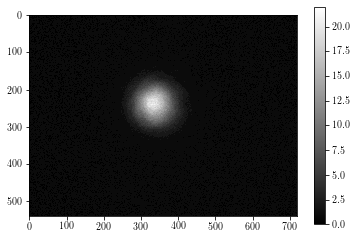

Testing mode...
Case1 result:  (0, 1)


/home/controls/Beam_auto_alignment/src/funcs.py:39: RuntimeWarning: invalid value encountered in true_divide
  Basis_vect /= float(np.sqrt(Basis_vect[0]**2. + Basis_vect[1]**2.))
/home/controls/Beam_auto_alignment/src/funcs.py:42: RuntimeWarning: invalid value encountered in long_scalars
  slope /= (P1[0]-P0[0])


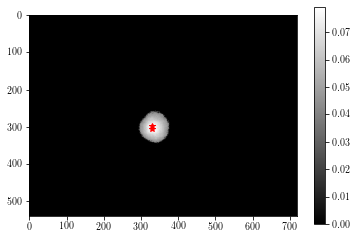

Mode is (0, 1)


 Gen: 9 Range: 1.2783086873522436 x waist
Time: 204.6658809185028, Fittest Parent: [-5.79800386e-05 -2.24983862e-05 -2.94167043e-05 -7.34636246e-05
  4.25480763e-08], Fitness: 180.16455078125


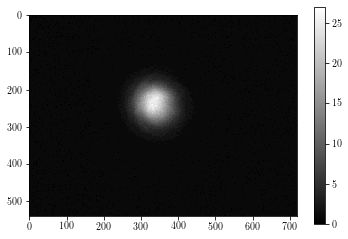



 Gen: 10 Range: 0.817036550080108 x waist
Time: 225.13432836532593, Fittest Parent: [ 1.69142739e-04 -2.40923626e-04  1.99495990e-03  6.94575739e-04
 -3.35666816e-07], Fitness: 170.612060546875


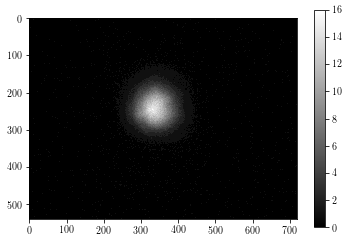



 Gen: 11 Range: 0.5222124599258542 x waist
Time: 245.67375326156616, Fittest Parent: [-1.18724148e-04  3.49895536e-04 -6.73102697e-04  1.75740566e-05
  1.92216517e-07], Fitness: 110.06109619140625


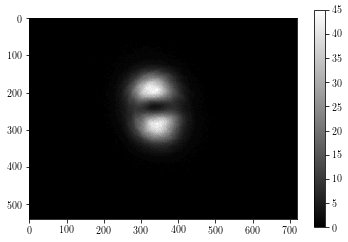



 Gen: 12 Range: 0.3337743620834024 x waist
Time: 266.26153922080994, Fittest Parent: [3.87506330e-05 1.48846081e-04 2.80658804e-04 6.79271144e-04
 7.23944942e-08], Fitness: 216.3731689453125


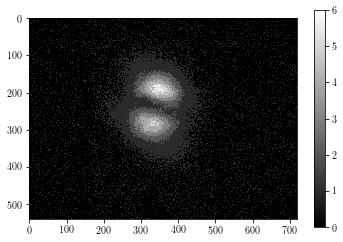

Testing mode...
Case1 result:  (2, 0)
Number of inferred peaks (3) from mode does not match with actual number of peaks(8)
Case2 result:  (0, 0)
Number of inferred peaks (1) from mode does not match with actual number of peaks(8)
Case3 corner_0 result:  (2, 0)
Number of inferred peaks (3) from mode does not match with actual number of peaks(8)
Case3 corner_1 result:  (5, 0)
Number of inferred peaks (6) from mode does not match with actual number of peaks(8)
Case3 corner_2 result:  (2, 4)
Number of inferred peaks (15) from mode does not match with actual number of peaks(8)
Case3 corner_3 result:  (5, 4)
Number of inferred peaks (30) from mode does not match with actual number of peaks(8)


/home/controls/Beam_auto_alignment/src/funcs.py:39: RuntimeWarning: invalid value encountered in true_divide
  Basis_vect /= float(np.sqrt(Basis_vect[0]**2. + Basis_vect[1]**2.))
/home/controls/Beam_auto_alignment/src/funcs.py:42: RuntimeWarning: invalid value encountered in long_scalars
  slope /= (P1[0]-P0[0])


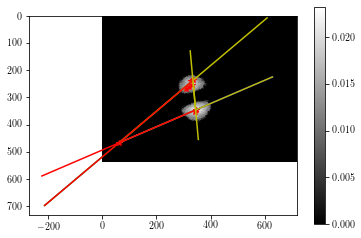

Mode is (5, 4)


 Gen: 13 Range: 1.2783086873522436 x waist


SystemError: <built-in function InstantCamera_GrabOne> returned a result with an error set

In [6]:
Range = Range_orig
# Creating the initial population of deltas
new_pop_deltas = sample_d(Range, shape=pop_size)
print("\n\nRange:", Range, "x waist")
# sess = tf.Session()

gen = 0
dont_alter_z_cm = False
t0 = time.time()

# GA loop
for gen in range(100):
    # Shrink range
    Range *= shrink_factor
    print("\n\n Gen: {} Range: {} x waist".format(gen, Range))
    if dont_alter_z_cm:
        new_pop_deltas[:,-1] = 0.
    if gen == 0:
        current_beam_status, new_pop_deltas, fitness = calc_pop_fitness(current_beam_status, \
        new_pop_deltas, fitness, camera, bus, only_offsprings=False)
    else:
        current_beam_status, new_pop_deltas, fitness = calc_pop_fitness(current_beam_status, \
        new_pop_deltas, fitness, camera, bus, only_offsprings=True)
    # Selecting the best parents in the population for mating.
    current_beam_status, parents, parents_fitness, Img_is_saturated, image = select_mating_pool(current_beam_status, new_pop_deltas, fitness, num_parents_mating, t0, gen, camera, bus, \
                           show_the_best=True, save_best=True)
    # Generating next generation using crossover.
    offspring_crossover = crossover(parents, (pop_per_gen - num_parents_mating, num_params))
    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover, Range)
    # Creating the new population based on the parents and offspring.
    new_pop_deltas[:num_parents_mating, :] = parents
    new_pop_deltas[num_parents_mating:, :] = offspring_mutation
    fitness[:num_parents_mating] = parents_fitness
    fitness[num_parents_mating:] *= 0.
#     # Scan the cavity and regain the max power point in z_CM
#     current_beam_status, new_pop_deltas, img = scan_cavity(current_beam_status, new_pop_deltas, \
#                                                            Range, Sz, camera, bus, show_fig=True)
    # Check mode at every 5th gen
#     if gen%5 == 0 and gen > 0:
    if Img_is_saturated or max(fitness) > 200. or gen > 15:
        Range = Range_orig
        Img_is_saturated = False
        print('Testing mode...')
        mode = Find_mode2(image, separation1=5, corner=0, show_fig=True, show_basis=True)
        print('Mode is {}'.format(mode))
        if np.all(mode == (0,0)):
            print('Fundamental mode identified! Exiting..')
            break
        else:
            # taking a jump in z_CM to make the cavity resonant to fundamental mode only
            current_beam_status, new_pop_deltas, _ = jump_2_fundamental(current_beam_status, new_pop_deltas, \
                                                                        mode, camera, bus, show_fig=True)
            # freezing z_CM 
            # dont_alter_z_cm = True

#     if (gen>7) and (Img_is_saturated):
#         image = pad_and_resize_image(image)
#         # time to check the mode
#         mode = read_mode(image)
#         print('Mode is {}'.format(mode))
#         if (int(mode[0][3]) + int(mode[0][5])) == 0:
#             print('Fundamental mode identified! Exiting..')
#             break

# Plot status

In [ ]:
Img1 = Capture_image(700, camera)
print(Img1.sum()/n_pixl**2)
plt.imshow(Img1[::-1], cmap=cm.binary_r)
plt.colorbar()

In [9]:
# Stop camera and DAC
camera.Close()
bus.stop()

## Make gif of the images

In [8]:
import imageio

files = os.listdir(ImagesFolder)
files.sort()
images = []
for filename in files:
    images.append(imageio.imread(ImagesFolder+'/'+filename))
imageio.mimsave(ImagesFolder + '/movie.gif', images, duration=0.5)